<a href="https://colab.research.google.com/github/BhavanaVijayasri/Machine-Learning-Algorithms/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Market Size of EV’s**

Market Size Analysis is the process of estimating the potential sales for a product or service within a particular market segment. In the context of electric vehicles (EVs), it involves assessing the total volume of EV
registrations to understand the growth of the market, forecast future trends, and help stakeholders make informed decisions regarding production, infrastructure development, and policy-making.

The provided dataset contains the following columns, each representing different aspects of the electric vehicle (EV) population in the United States:


**VIN (1-10):** Partial Vehicle Identification Number.


**County:** The county in which the vehicle is registered.

**City:**The city in which the vehicle is registered.


**State:** The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.

**Postal Code:** The postal code where the vehicle is registered.

**Model Year:** The year of the vehicle model.

**Make:**The manufacturer of the vehicle.

**Model:** The model of the vehicle.

**Electric Vehicle Type:** The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).

**Clean Alternative Fuel Vehicle (CAFV) Eligibility**: Eligibility status for clean alternative fuel vehicle programs.

**Electric Range:**The maximum range of the vehicle on a single charge (in miles).

**Base MSRP:** The Manufacturer’s Suggested Retail Price.

**Legislative District:** The legislative district where the vehicle is registered.

**DOL Vehicle ID:** Department of Licensing Vehicle Identification.

**Vehicle Location:** Geographic coordinates of the vehicle location.

**Electric Utility:** The electric utility service provider for the vehicle’s location.

**2020 Census Tract:** The census tract for the vehicle’s location.

The primary objective of this analysis is to leverage historical EV registration data to understand the current market penetration of EVs, predict future market growth, and identify key trends and factors driving market expansion.

#The setup provides an all-in-one environment for:

**Data handling**: using pandas for loading and manipulating datasets.
**Machine learning**: using scikit-learn for building and evaluating models (like linear regression).
**Data visualization**: using matplotlib, seaborn, and plotly for both static and interactive visualizations to explore and communicate insights effectively.

In [1]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression as lr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


This code imports an external CSV file containing electric vehicle population data from Google Drive and loads it into a DataFrame for further manipulation, analysis, and exploration using pandas.

In [3]:
df=pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

The df.info() method provides a concise summary of the DataFrame, helping you understand the structure, completeness, and data types of the dataset. This information is useful for assessing data quality and determining what kind of data cleaning or preprocessing may be needed.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object


The df.head() function provides a brief overview of the data by displaying the first few rows of the DataFrame. It's helpful for quickly inspecting the dataset's structure, identifying column names, understanding the data types, and spotting any obvious issues like missing values or incorrect data formats.

In [5]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


The df.describe() function provides a summary of the central tendencies and spread for each numerical column in the DataFrame. It helps identify any anomalies, outliers, or trends in the dataset, and gives a quick overview of the data distribution, which is useful for exploratory data analysis.

In [ ]:
df.describe()

,Postal Code,Model Year,Electric Range,Legislative District,DOL Vehicle ID,2020 Census Tract
count,100084.000000,100084.000000,100084.000000,100061.000000,1.000840e+05,1.000830e+05
mean,98194.514678,2020.556083,59.340214,31.340292,2.204293e+08,5.302827e+10
std,772.502192,2.954548,92.271599,14.462908,7.652801e+07,5.548477e+08
min,17013.000000,1998.000000,0.000000,1.000000,4.777000e+03,6.013350e+09
25%,98040.000000,2019.000000,0.000000,20.000000,1.821659e+08,5.303301e+10
50%,98112.000000,2022.000000,0.000000,36.000000,2.283011e+08,5.303302e+10
75%,98258.000000,2023.000000,82.000000,44.000000,2.547303e+08,5.303303e+10
max,99403.000000,2024.000000,337.000000,49.000000,4.789259e+08,5.307794e+10


The code df = df.drop('Base MSRP', axis=1) is used to remove the column named 'Base MSRP' from the DataFrame df.

In [6]:
df = df.drop('Base MSRP',axis=1)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


This code is used to visualize the historical trend of electric vehicle registrations over different model years. The line plot provides insight into how registrations have grown or fluctuated, and it offers a clear and intuitive way to assess this historical data.

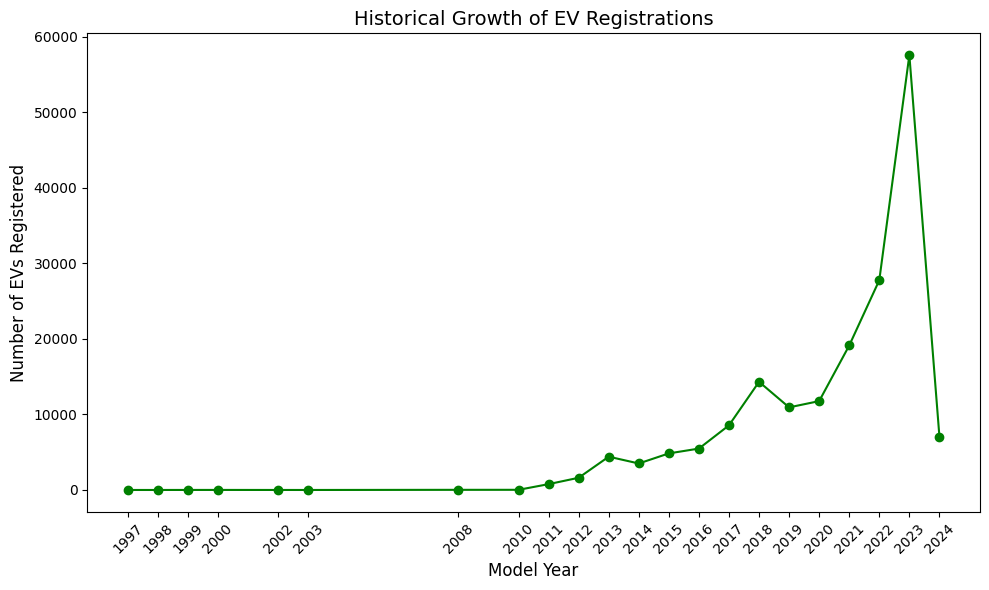

In [8]:
grp = df.groupby('Model Year').size()
plt.figure(figsize=(10, 6))
plt.plot(grp.index, grp.values, marker='o', linestyle='-', color='g')
plt.title('Historical Growth of EV Registrations', fontsize=14)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of EVs Registered', fontsize=12)
plt.xticks(grp.index, rotation=45)
plt.tight_layout()
plt.show()


This code visualizes the historical growth of EV registrations and forecasts the future trend using linear regression. It provides insights into past EV registration trends and allows the user to predict what EV registration numbers might look like in the next 5 years. The graph helps to compare historical data with future forecasts, making it a useful tool for analysis and presentation.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


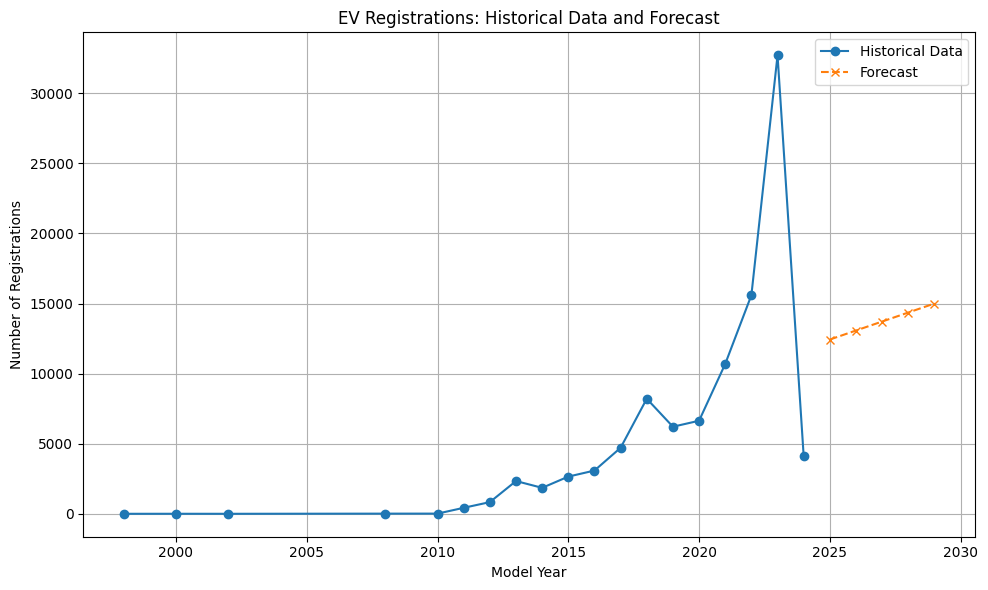

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

ev_growth = df.groupby('Model Year').size().reset_index(name='Registrations')

X = ev_growth[['Model Year']]
y = ev_growth['Registrations']

model = LinearRegression()
model.fit(X, y)

# Convert the maximum Model Year to an integer before using it in range()
future_years = np.array(range(int(ev_growth['Model Year'].max()) + 1, int(ev_growth['Model Year'].max()) + 6)).reshape(-1, 1)
future_predictions = model.predict(future_years)

plt.figure(figsize=(10, 6))
plt.plot(ev_growth['Model Year'], ev_growth['Registrations'], label='Historical Data', marker='o')
plt.plot(future_years, future_predictions, label='Forecast', marker='x', linestyle='--')

plt.title('EV Registrations: Historical Data and Forecast')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The plot provides a valuable visual representation of the historical growth of EV registrations and extends the trend into the future with a forecast.


The clear distinction between historical and forecasted data points, along with informative labels, makes it easy to interpret the past and anticipate the future




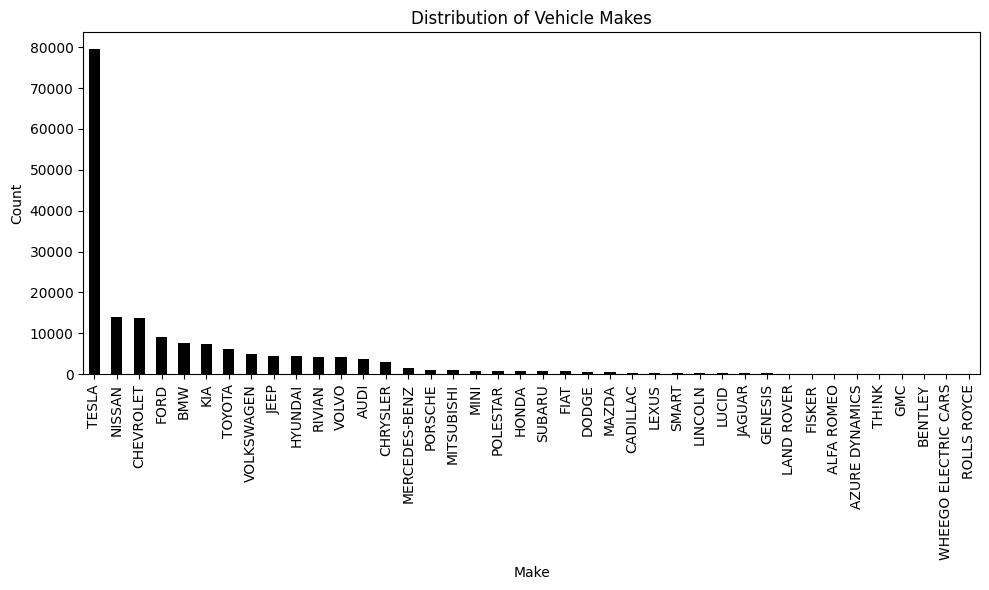

In [9]:
make_counts = df['Make'].value_counts()
plt.figure(figsize=(10, 6))
make_counts.plot(kind='bar', color='black')
plt.title('Distribution of Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The plot provides a clear visual representation of the distribution of EV makes, highlighting the most popular and least popular manufacturers in the market.

The plot effectively communicates the distribution of vehicle makes in the EV market, enabling viewers to quickly identify the dominant players and the overall market landscape

<ipython-input-20-898c189ddc54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_counts.values, y=make_counts.index, palette="viridis")


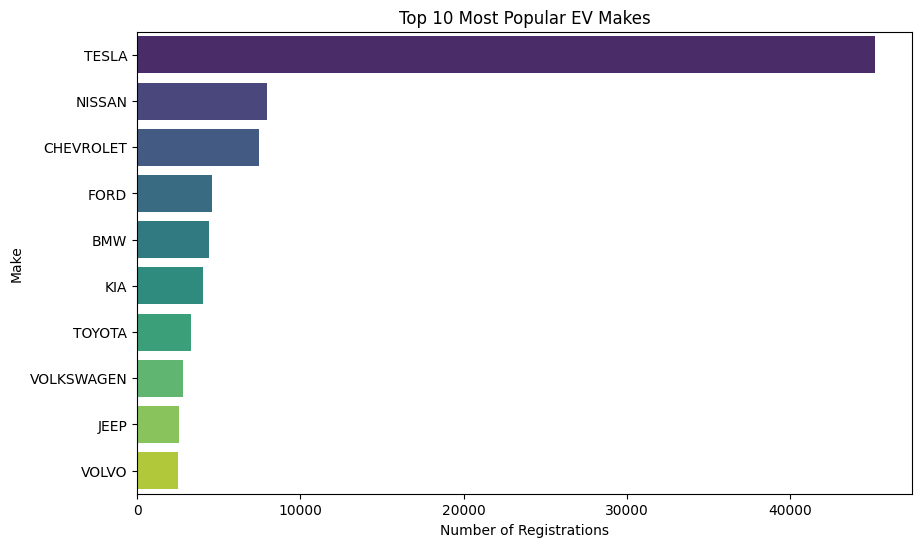

In [ ]:
make_counts = df['Make'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=make_counts.values, y=make_counts.index, palette="viridis")
plt.title('Top 10 Most Popular EV Makes')
plt.xlabel('Number of Registrations')
plt.ylabel('Make')
plt.show()

The plot provides a concise visual representation of the top 10 most popular EV makes, allowing for quick comparison of their relative popularity based on number of registrations.


<ipython-input-21-7d54715119b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')


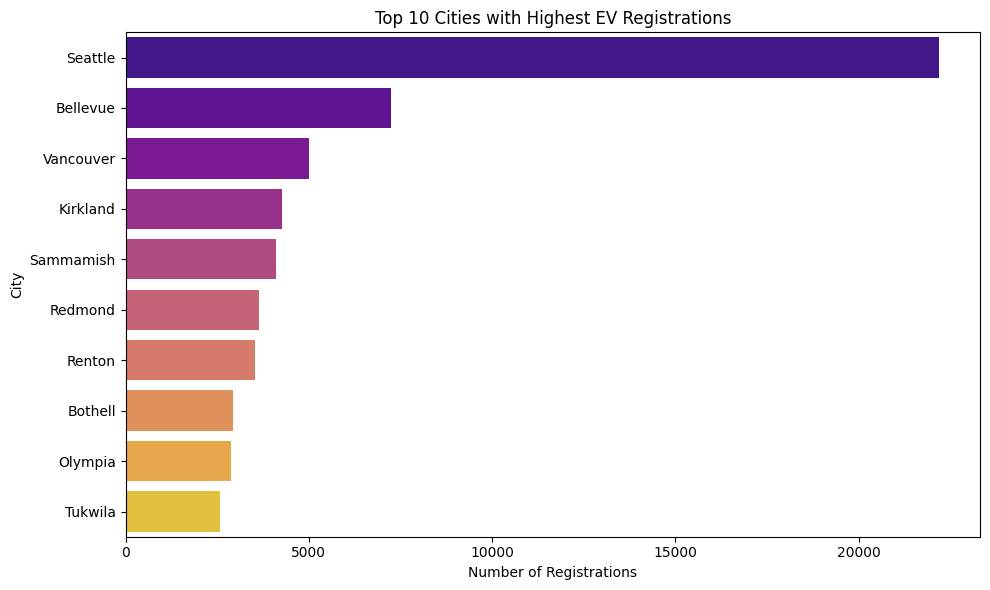

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you're using seaborn for the barplot
import pandas as pd # Assuming you're using pandas

# Assuming 'df' is your DataFrame and 'City' is the column with city information
top_cities = df['City'].value_counts().head(10) # Defining the top_cities variable

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='plasma')
plt.title('Top 10 Cities with Highest EV Registrations')
plt.xlabel('Number of Registrations')
plt.tight_layout()
plt.show()

The plot effectively communicates the distribution of EV registrations across the top 10 cities, highlighting the areas with the highest concentration of EVs and providing insights into regional variations in EV adoption.

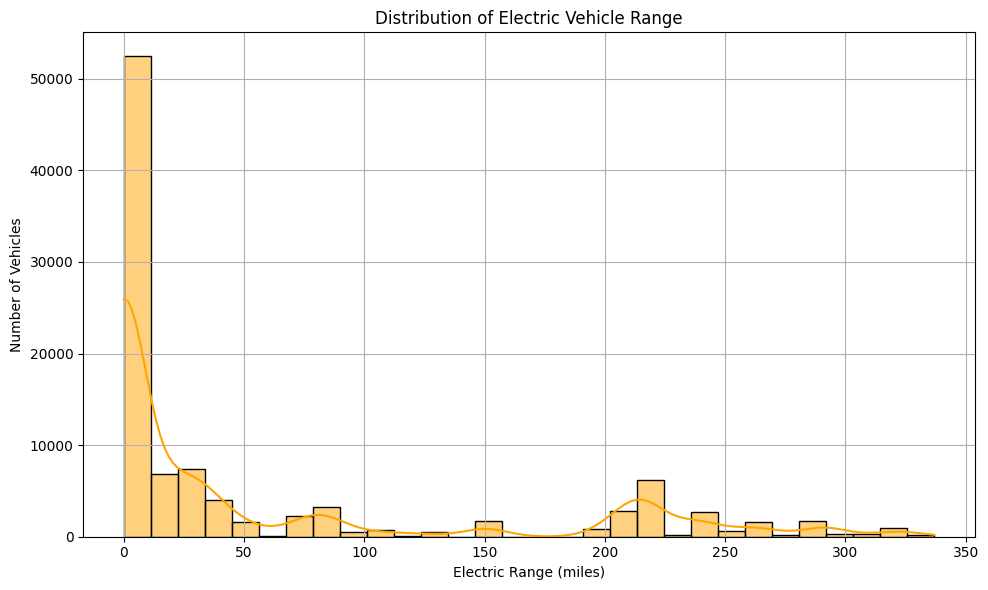

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='orange')  # Changed color to 'orange'
plt.title('Distribution of Electric Vehicle Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot effectively communicates the distribution of electric vehicle ranges, highlighting the typical range values and the variability across different EV models.

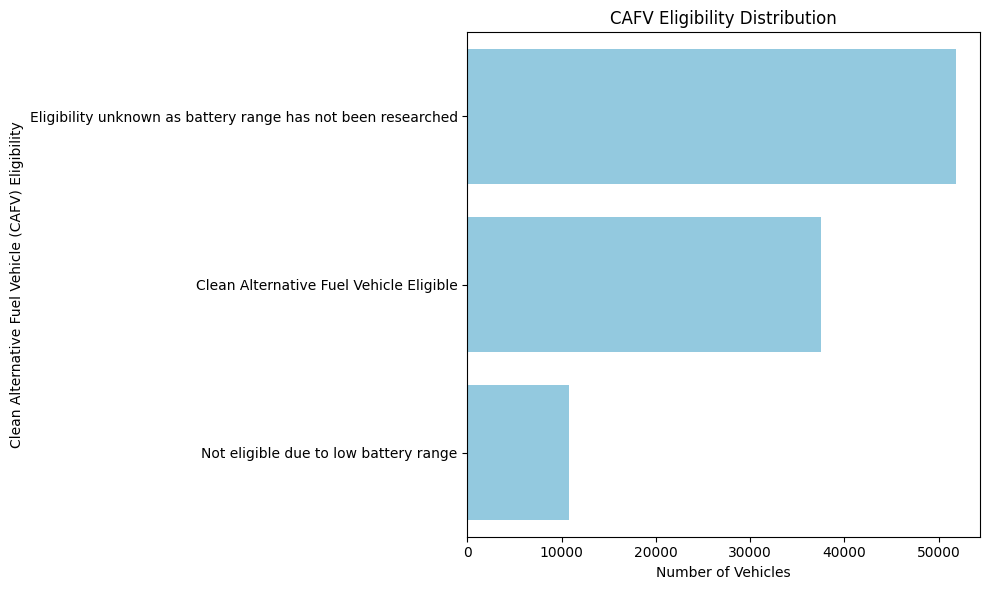

In [ ]:
cafv_distribution = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plot the CAFV eligibility distribution with a single color
plt.figure(figsize=(10, 6))
sns.barplot(x=cafv_distribution.values, y=cafv_distribution.index, color='skyblue')
plt.title('CAFV Eligibility Distribution')
plt.xlabel('Number of Vehicles')
plt.tight_layout()
plt.show()



The plot provides a clear visual representation of the proportion of EVs that are eligible and not eligible for CAFV programs

<ipython-input-24-ffe18356803f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.values, y=model_counts.index, palette="coolwarm")


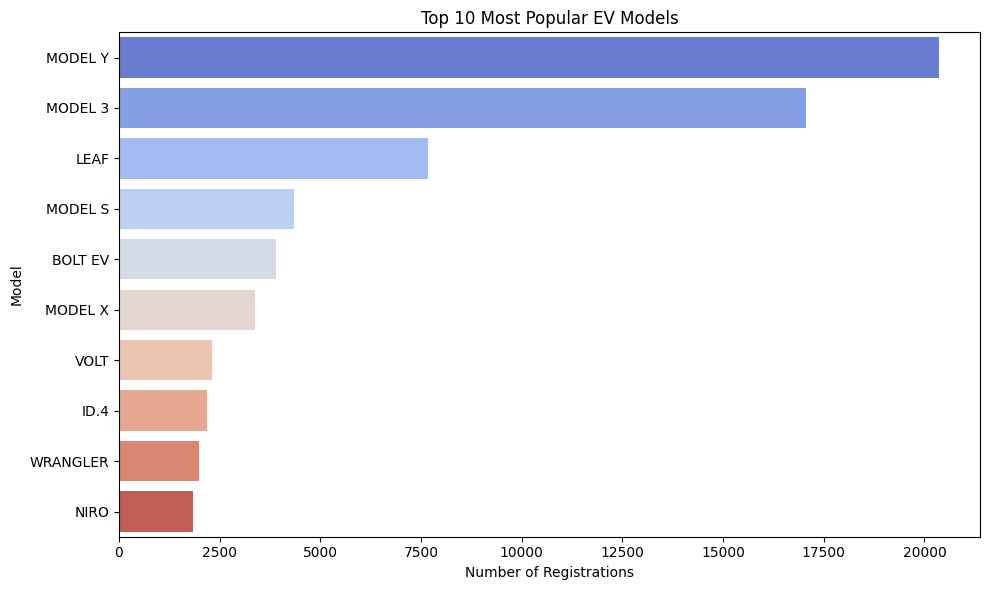

In [ ]:
model_counts = df['Model'].value_counts().head(10)  # Top 10 models

# Plot the top 10 most popular EV Models with 'coolwarm' palette
plt.figure(figsize=(10, 6))
sns.barplot(x=model_counts.values, y=model_counts.index, palette="coolwarm")
plt.title('Top 10 Most Popular EV Models')
plt.xlabel('Number of Registrations')
plt.ylabel('Model')
plt.tight_layout()
plt.show()



The plot effectively communicates the popularity of the top 10 EV models, highlighting the dominant players and their relative market

The plot provides a clear visual representation of the relative popularity of different electric vehicle types

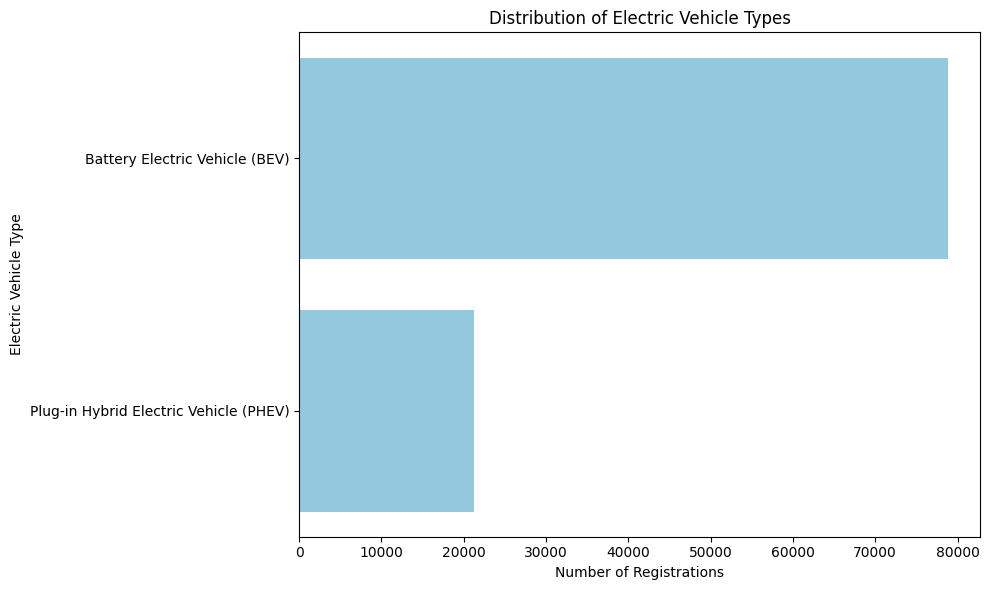

In [ ]:
ev_type_distribution = df['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, color='skyblue')  # Using a single color
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Registrations')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The plot provides a geographical overview of EV adoption across the US, highlighting states with higher and lower concentrations of EVs.

Providing insights into regional variations in EV adoption and highlighting states with higher EV penetration



In [ ]:
import pandas as pd
import plotly.express as px

state_ev_counts = df.groupby('State')['Electric Vehicle Type'].count().reset_index()
state_ev_counts.rename(columns={'Electric Vehicle Type': 'Registrations'}, inplace=True)

# Now you can create the choropleth map
fig = px.choropleth(state_ev_counts,
                    locations='State',
                    locationmode='USA-states',
                    color='Registrations',
                    scope='usa',
                    hover_name='State',
                    color_continuous_scale='Blues',
                    title='EV Registrations by State in the US'
                   )
fig.show()